In [23]:
import pandas as pd
import seaborn as sns
from bokeh.charts import Line
from bokeh.layouts import gridplot, row
from bokeh.plotting import figure, output_notebook, show
%matplotlib inline

In [24]:
pd_dados = pd.read_csv('turma_professor_notas.csv')
pd_disciplinas = pd.read_csv('disciplinas.csv')

## 1) Notas das turmas tem muita diferença entre um mesmo semestre?

In [32]:
listTabs = []
for index, row in pd_disciplinas.iterrows():
    
    y = pd_dados[pd_dados['nome_disc'] == row['nome_disc']]['reprovados']
    x = []
    for index_disc, row_disc in pd_dados[pd_dados['nome_disc'] == row['nome_disc']].iterrows():
        if (int(row_disc['periodo']) == 1):
            x.append(str(row_disc['ano'])+""+str(0))
        else:
           x.append(str(row_disc['ano'])+""+str(5))
        
    p = figure(plot_width=400, plot_height=300, y_range=(0, 50), title=row['nome_disc'], x_axis_label='ano/semestre', y_axis_label='Quant Reprovados')
    p.circle(x, y, fill_color="white", size=12,)
    listTabs.append(p)

output_notebook()
grid = gridplot([[ listTabs[0], listTabs[1]],[ listTabs[2], listTabs[3]]])
show(grid)

Loading BokehJS ...

## 2) FMC2 tem menos reprovações pq tem menos pessoas matriculadas ?

In [26]:
listTabs = []
for index, row in pd_disciplinas.iterrows():
    x = ['20140', '20145', '20150', '20155', '20160', '20165', '20170']

    listCount = []
    for count in pd_dados.groupby(['nome_disc', 'ano_periodo'])['total_alunos'].sum()[row['nome_disc']]:
        listCount.append(count)

    p = figure(plot_width=400, plot_height=300, y_range=(0, 1000), title=row['nome_disc'], x_axis_label='ano/semestre', y_axis_label='Total Matriculados')
    p.line(x, listCount)
    listTabs.append(p)

output_notebook()
grid = gridplot([[ listTabs[0], listTabs[1]],[ listTabs[2], listTabs[3]]])
show(grid)

Loading BokehJS ...

## 3) Vamos juntar esses gráficos para comparar melhor

In [27]:
listTabsY = []
for index, row in pd_disciplinas.iterrows():
    listCount = []
    for count in pd_dados.groupby(['nome_disc', 'ano_periodo'])['total_alunos'].sum()[row['nome_disc']]:
        listCount.append(count)
    listTabsY.append(listCount)


data = dict(RPMTI = listTabsY[0], C1 = listTabsY[1], FMC1 = listTabsY[2], FMC2 = listTabsY[3], Semestre=x)
df = pd.DataFrame(data)

line = Line(df, y=['RPMTI', 'C1', 'FMC1', 'FMC2'], x='Semestre', dash=['RPMTI', 'C1', 'FMC1', 'FMC2'],
            title="Matriculados por semestre", ylabel='Total de matriculados', xlabel="Ano/Semestre", 
            legend=True, plot_width=800)
output_notebook()
show(line)

Loading BokehJS ...

## 4) Qual a porcentagem de reprovação da galera ?

In [28]:
listAlunos = []
listRep = []
for index, row in pd_disciplinas.iterrows():
    listTotalAlunos = []
    listTotalReprovados = []
    
    for totalAlunos in pd_dados.groupby(['nome_disc', 'ano_periodo'])['total_alunos'].sum()[row['nome_disc']]:
        listTotalAlunos.append(totalAlunos)
        
    for totalRep in pd_dados.groupby(['nome_disc', 'ano_periodo'])['reprovados'].sum()[row['nome_disc']]:
        listTotalReprovados.append(totalRep)
        
    listAlunos.append(listTotalAlunos)
    listRep.append(listTotalReprovados)

listTabsY = []
for apro, rep in zip(listAlunos, listRep):
    listTabsYAux = []
    for i in range(len(apro)):
        listTabsYAux.append((rep[i]/apro[i])*100)
    listTabsY.append(listTabsYAux)
    
data = dict(RPMTI = listTabsY[0], C1 = listTabsY[1], FMC1 = listTabsY[2], FMC2 = listTabsY[3], Semestre=x)
df = pd.DataFrame(data)

line = Line(df, y=['RPMTI', 'C1', 'FMC1', 'FMC2'], x='Semestre', dash=['RPMTI', 'C1', 'FMC1', 'FMC2'],
            title="% de reprovados por disciplina", ylabel='Taxa de reprovados', xlabel="Ano/Semestre", 
            legend=True, plot_width=800)

output_notebook()
show(line)

Loading BokehJS ...

## 5) Quais professores estão gerando mais reprovações?

In [29]:
((pd_dados.groupby(['nome_prof'])['reprovados'].sum()/pd_dados.groupby(['nome_prof'])['total_alunos'].sum())*100).sort_values()

nome_prof
AUGUSTO JORGE DE MACEDO                14.285714
ALYSON MATHEUS DE CARVALHO SOUZA       31.623932
CHARLES ANDRYE GALVAO MADEIRA          33.530572
ADJA FERREIRA DE ANDRADE               35.294118
vazio                                  42.548217
RAFAELA HORACINA SILVA ROCHA SOARES    53.741497
LOURENA KARIN DE MEDEIROS ROCHA        55.250000
REGIVAN HUGO NUNES SANTIAGO            55.395683
ANDERSON PAIVA CRUZ                    56.065574
ANTONIO IGOR SILVA DE OLIVEIRA         56.175299
SAMYR SILVA BEZERRA JACOME             60.330579
CARLOS AUGUSTO PROLO                   67.300380
UMBERTO RIVIECCIO                      69.230769
JOAO MARCOS DE ALMEIDA                 74.074074
ATHANASIOS TSOUANAS                    82.412060
dtype: float64

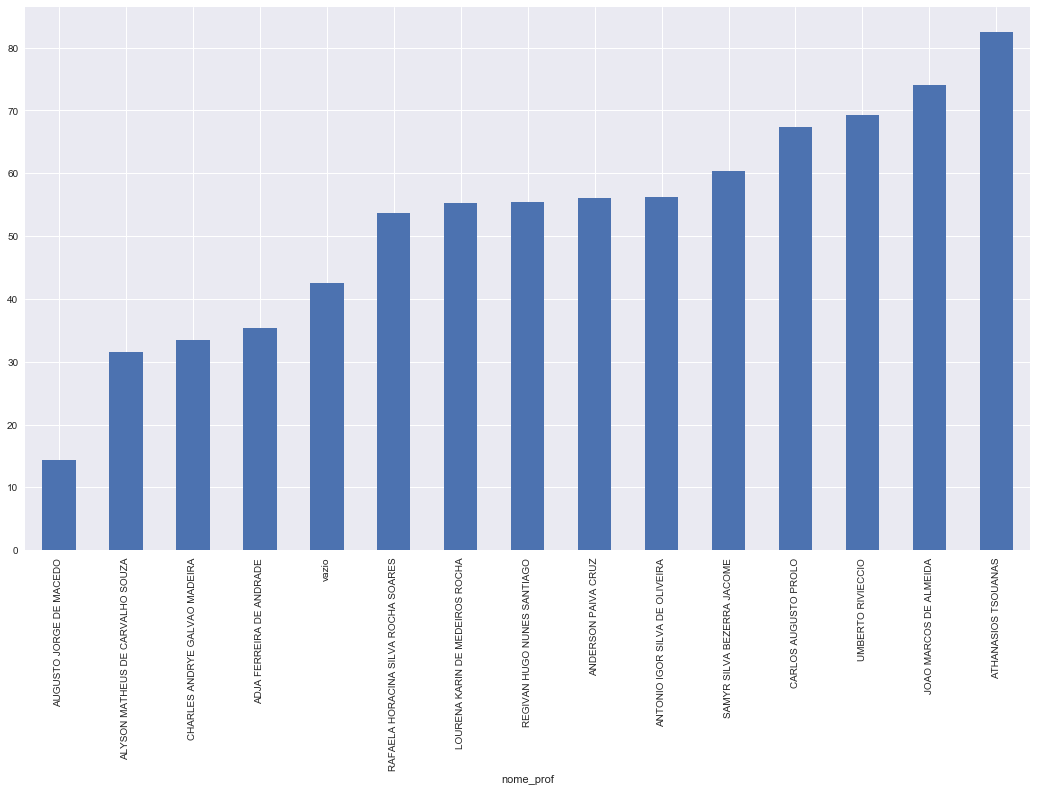

In [30]:
((pd_dados.groupby(['nome_prof'])['reprovados'].sum()/pd_dados.groupby(['nome_prof'])['total_alunos'].sum())*100).sort_values().plot(kind='bar', figsize=(18, 10))